In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Nicolas
[nltk_data]     Pozdena\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
# read data, assign column names, skip header
data = pd.read_csv("depression_dataset_reddit_cleaned.csv", names=["text", "is_depression"], header=0)

# Visualiziation of data

### depressions = orange  | not depressed = blue

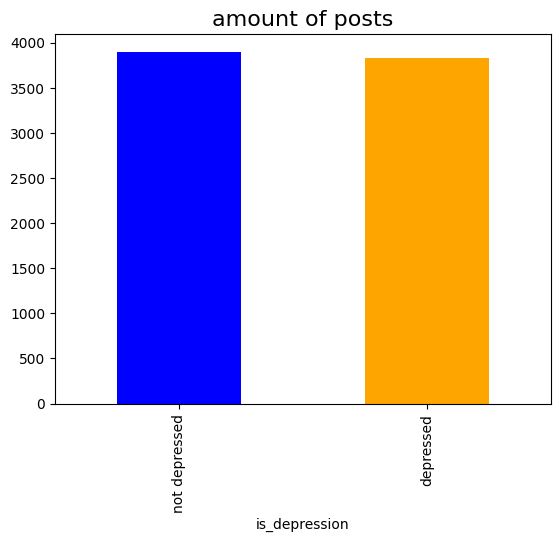

In [4]:
counts = data["is_depression"].map({0: "not depressed", 1: "depressed"}).value_counts()

counts.plot(kind='bar', color=['blue', 'orange'])
plt.title("amount of posts", fontsize=16)

plt.show()

loss not depressed 0
loss depressed 587


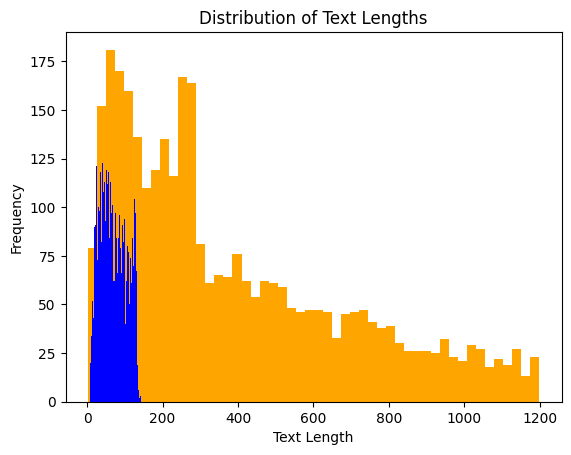

In [5]:
data["length"] = data["text"].apply(len)

notDepressed = data[data["is_depression"] == 0]
depressed = data[data["is_depression"] == 1]

nD = len(notDepressed)
d = len(depressed)

# for better visualization
notDepressed = notDepressed[notDepressed["length"] < 1200]
depressed = depressed[depressed["length"] < 1200]

# how many posts did we lose
print(f"loss not depressed {nD - len(notDepressed)}")
print(f"loss depressed {d - len(depressed)}")

plt.hist(depressed['length'], color='orange', bins=50)
plt.hist(notDepressed['length'],color='blue', bins=50)



plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

clearly depression texts are longer

In [6]:
def removingStopWords(text):
    words = text.split(' ')
    valuedWords = [word for word in words if word not in stopwords.words('english')]
    return valuedWords

data["valueWords"] = data["text"].apply(removingStopWords)
data["valueLength"] = data["valueWords"].apply(len)

data

text  \
0     we understand that most people who reply immediately to an op with an invitation to talk privately mean only to help but this type of response usually lead to either disappointment or disaster it usually work out quite differently here than when you say pm me anytime in a casual social context we have huge admiration and appreciation for the goodwill and good citizenship of so many of you who support others here and flag inappropriate content even more so because we know that so many of you are struggling yourselves we re hard at work behind the scene on more information and resource to make it easier to give and get quality help here this is just a small start our new wiki page explains in detail why it s much better to respond in public comment at least until you ve gotten to know someone it will be maintained at r depression wiki private contact and the full text of the current version is below summary anyone who while acting a a helper invite or accepts private contact i e pm chat or any kind of offsite communication early in the conversion is showing either bad intention or bad judgement either way it s unwise to trust them pm me anytime seems like a kind and generous offer and it might be perfectly well meaning but unless and until a solid rapport ha been established it s just not a wise idea here are some point to consider before you offer or accept an invitation to communicate privately by posting supportive reply publicly you ll help more people than just the op if your response are of good quality you ll educate and inspire other helper the 9 90 rule http en wikipedia org wiki rule internet culture applies here a much a it doe anywhere else on the internet people who are struggling with serious mental health issue often justifiably have a low tolerance for disappointment and a high level of ever changing emotional need unless the helper is able to make a 00 commitment to be there for them in every way for a long a necessary offering a personal inbox a a resource is likely to do more harm than good this is why mental health crisis line responder usually don t give their name and caller aren t allowed to request specific responder it s much healthier and safer for the caller to develop a relationship with the agency a a whole analogously it s much safer and healthier for our ops to develop a relationship with the community a a whole even trained responder are generally not allowed to work high intensity situation alone it s partly about availability but it s mostly about wider perspective and preventing compassion fatigue if a helper get in over their head with someone whose mental health issue including suicidality which is often comorbid with depression escalate in a pm conversation it s much harder for others including the r depression and r suicidewatch moderator to help contrary to common assumption moderator can t see or police pm in our observation over many year the people who say pm me the most are consistently the one with the least understanding of mental health issue and mental health support we all have gap in our knowledge and in our ability to communicate effectively community input mitigates these limitation there s no reason why someone who s truly here to help would want to hide their response from community scrutiny if helper are concerned about their own privacy keep in mind that self disclosure when used supportively is more about the feeling than the detail and that we have no problem here with the use of alt throwaway account and have no restriction on account age or karma we all know the internet is used by some people to exploit or abuse others these people do want to hide their deceptive and manipulative response from everyone except their victim there are many of them who specifically target those who are vulnerable because of mental health issue if a helper invite an op to talk privately and give them a good supportive experience they ve primed that person to be more vulnerable

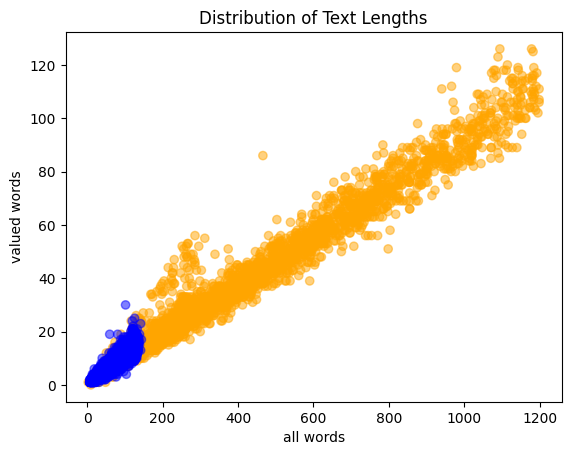

In [7]:

words = data[data["length"] < 1200]

colorMap = ["blue", "orange"]
colors = [colorMap[val] for val in words["is_depression"]]

plt.scatter(words["length"],words["valueLength"], color=colors, marker='o', alpha=0.5)


plt.title('Distribution of Text Lengths')
plt.xlabel('all words')
plt.ylabel('valued words')
plt.show()

In [12]:
data['valueText'] = data["valueWords"].apply(lambda  x: ' '.join(x))

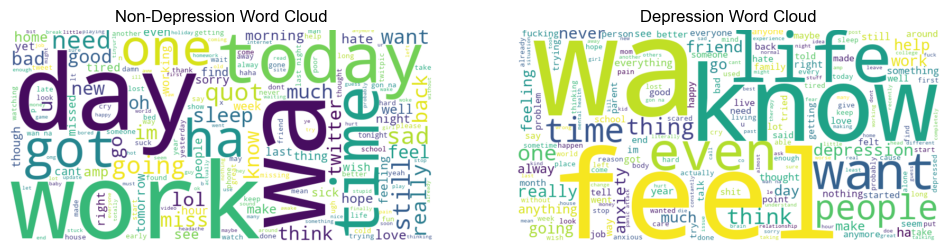

In [13]:
ndText = ' '.join(data['valueText'].loc[data['is_depression']==0])
dText = ' '.join(data['valueText'].loc[data['is_depression']==1])

# Create WordCloud objects for each category
ndWordcloud = WordCloud(width=800, height=400, background_color='white').generate(ndText)
dWordcloud = WordCloud(width=800, height=400, background_color='white').generate(dText)


plt.rcParams['font.sans-serif'] = 'Arial'


# Display the non-depression word cloud
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(ndWordcloud, interpolation='bilinear')
plt.title('Non-Depression Word Cloud')
plt.axis('off')

# Display the depression word cloud
plt.subplot(1, 2, 2)
plt.imshow(dWordcloud, interpolation='bilinear')
plt.title('Depression Word Cloud')
plt.axis('off')

plt.show()

In [14]:
# look at some samples
print("depression:\n" + 
      str(data[data["is_depression"] == 1].sample(n=3).text.tolist()))
print("not depression:\n" + 
      str(data[data["is_depression"] == 0].sample(n=3).text.tolist()))

depression:
['i ve had tinnitus for like year could it be somehow related to anxiety also neck pain for year tension mainly thanks for answer', 'i try to play video game but just quit immediately and the same thing happens with my guitar i just can t do either one', 'and i feel nothing nothing at all i almost flunked out of college twice and here i am with straight a s last quarter and i m slated for a similar gpa this quarter and yet i don t feel a thing about it everyone is telling me how proud i should be i went from a high school slacker to the one looking into med school to the family fuck up and now the one doing ok all within a few year fuck i should be proud and yet i literally do not give a shit all i feel is apathy i m just so fucking tired i feel like i m just going through the motion not sure what i m looking for with this post i just had to tell someone that i lack the capacity to care my parent and partner were so happy when i told them the grade i don t have the heart to

In [15]:
# class balance
print(data[data["is_depression"] == 1].count())
print(data[data["is_depression"] == 0].count())

text             3831
is_depression    3831
length           3831
valueWords       3831
valueLength      3831
valueText        3831
dtype: int64
text             3900
is_depression    3900
length           3900
valueWords       3900
valueLength      3900
valueText        3900
dtype: int64


In [16]:
# the samples suggest, the id_depression texts are longer than the others. Is that really so?
# print average length, min length and max length of elements shows that length could be an important factor
print("depression:\n"
      "avg: " + str(sum(map(len, data[data["is_depression"] == 1].text))/float(len(data[data["is_depression"] == 1].text))) + "\n" +
      "min: " + str(min(map(len, data[data["is_depression"] == 1].text))) + "\n" +
      "max: " + str(max(map(len, data[data["is_depression"] == 1].text))) + "\n"
      )
print("not depression:\n"
      "avg: " + str(sum(map(len, data[data["is_depression"] == 0].text))/float(len(data[data["is_depression"] == 1].text))) + "\n" +
      "min: " + str(min(map(len, data[data["is_depression"] == 0].text))) + "\n" +
      "max: " + str(max(map(len, data[data["is_depression"] == 0].text))) + "\n"
      )

depression:
avg: 658.299138606108
min: 3
max: 19822

not depression:
avg: 70.97572435395458
min: 7
max: 144


In [17]:
def preprocess(text):
    # remove extra blanks
    re.sub(r'\t{2,}', ' ', text)
    # lowercase
    text = text.lower()
    # TODO other stuff
    return text
    
data["text"] = data["text"].apply(preprocess)

In [18]:
# feature extraction
# vectorizer does tokenization, data already lowercased
# https://scikit-learn.org/stable/modules/feature_extraction.html
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer
X = data['text'].to_numpy()
y = data['is_depression'].to_numpy()
# Bag of words
vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 1))
X_BOW = vectorizer.fit_transform(X)

In [19]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_BOW, y)

In [20]:
# train
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
# predict
y_hat = clf.predict(X_test)

In [21]:
# evaluate
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
tn, fp, fn, tp = confusion_matrix(y_test, y_hat).ravel()
accuracy = accuracy_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat, zero_division=1.0)
print(tn, fp, fn, tp, accuracy, f1)

739 247 62 885 0.8401448525607863 0.8513708513708513


In [22]:
# trying to encode the documents using TFIDF instead of words
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer
# encode
vectorizer = TfidfVectorizer()
X_TFIDF = vectorizer.fit_transform(X)
# split
X_train, X_test, y_train, y_test = train_test_split(X_TFIDF, y)
# train
clf = MultinomialNB()
clf.fit(X_train, y_train)
# predict
y_hat = clf.predict(X_test)
# evaluate
tn, fp, fn, tp = confusion_matrix(y_test, y_hat).ravel()
accuracy = accuracy_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat, zero_division=1.0)
print(tn, fp, fn, tp, accuracy, f1)

563 434 10 926 0.7703052250387998 0.8066202090592335


In [23]:
# this is a little experiment: how well would a model perform, which is only trained on length of text?
X = data["text"].apply(len).to_numpy().reshape(-1,1)
y = data["is_depression"].to_numpy()
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y)
# train
clf = MultinomialNB()
clf.fit(X_train, y_train)
# predict
y_hat = clf.predict(X_test)
# evaluate
tn, fp, fn, tp = confusion_matrix(y_test, y_hat).ravel()
accuracy = accuracy_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat, zero_division=1.0)
# it just thinks everything is not depression. so 50%. works horrible.
# we could try adding some more features if we feel like it, but not right now.
print(tn, fp, fn, tp, accuracy, f1)
print(np.unique(y_hat, return_counts=True))

996 0 937 0 0.5152612519399896 0.0
(array([0], dtype=int64), array([1933], dtype=int64))
